In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import logging

import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import diffxpy.api as de

In [3]:
logging.getLogger("tensorflow").setLevel(logging.ERROR)
logging.getLogger("batchglm").setLevel(logging.INFO)
logging.getLogger("diffxpy").setLevel(logging.INFO)

# Generate some data:

In [4]:
from batchglm.api.models.glm_nb import Simulator

sim = Simulator(num_observations=2000, num_features=100)
sim.generate_sample_description(num_batches=0, num_conditions=2)
sim.generate_params()
sim.generate_data()

In [5]:
random_sample_description = pd.DataFrame({
    "pseudotime": np.random.random(size=sim.num_observations),
    "batch": np.random.randint(2, size=sim.num_observations)
})

In [6]:
random_sample_description.iloc[:3,:]

,pseudotime,batch
0,0.334291,0
1,0.772328,0
2,0.693727,0


Add batch effect:

In [7]:
X = sim.X
X[random_sample_description['batch']==0,:] = X[random_sample_description['batch']==0,:]*2

# Run differential expression test

In [8]:
test = de.test.continuous_1d(
    data=X,
    continuous="pseudotime",
    df=3,
    formula_loc="~ 1 + pseudotime + batch",
    factor_loc_totest="pseudotime",
    test="wald",
    sample_description=random_sample_description,
    quick_scale=False,
    batch_size=100,
    training_strategy="DEFAULT",
    dtype="float64"
)

INFO:diffxpy.testing.base:Fitting model...


/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/Users/david.fischer/miniconda3/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)


# Obtain the results

In [9]:
test.summary()

,gene,pval,qval,log2fc,mean,grad,ll
0,0,0.999900,0.999900,3.108679,598.4035,6.716849e-13,-14270.723531
1,1,0.396984,0.938695,7.718297,1173.1815,-2.575077e-01,-15959.717914
2,2,0.188411,0.842777,8.365532,938.3585,-3.976399e-02,-15535.977926
3,3,0.400869,0.938695,7.761656,760.4935,-2.817551e-02,-15104.797437
4,4,0.726509,0.938695,6.626268,904.9710,-1.049830e+00,-15362.161593
5,5,0.321008,0.917166,8.365885,1098.2975,1.541922e-04,-15886.516229
6,6,0.294712,0.892737,7.269525,1009.0055,-2.880706e+00,-15511.650102
7,7,0.658923,0.938695,7.115154,938.8985,-3.119961e-01,-15482.302181
8,8,0.137888,0.842777,8.244410,780.4580,7.702220e-05,-15215.063440
9,9,0.546403,0.938695,6.330762,605.1360,-2.046344e-02,-14660.529843


Plot fits by gene:

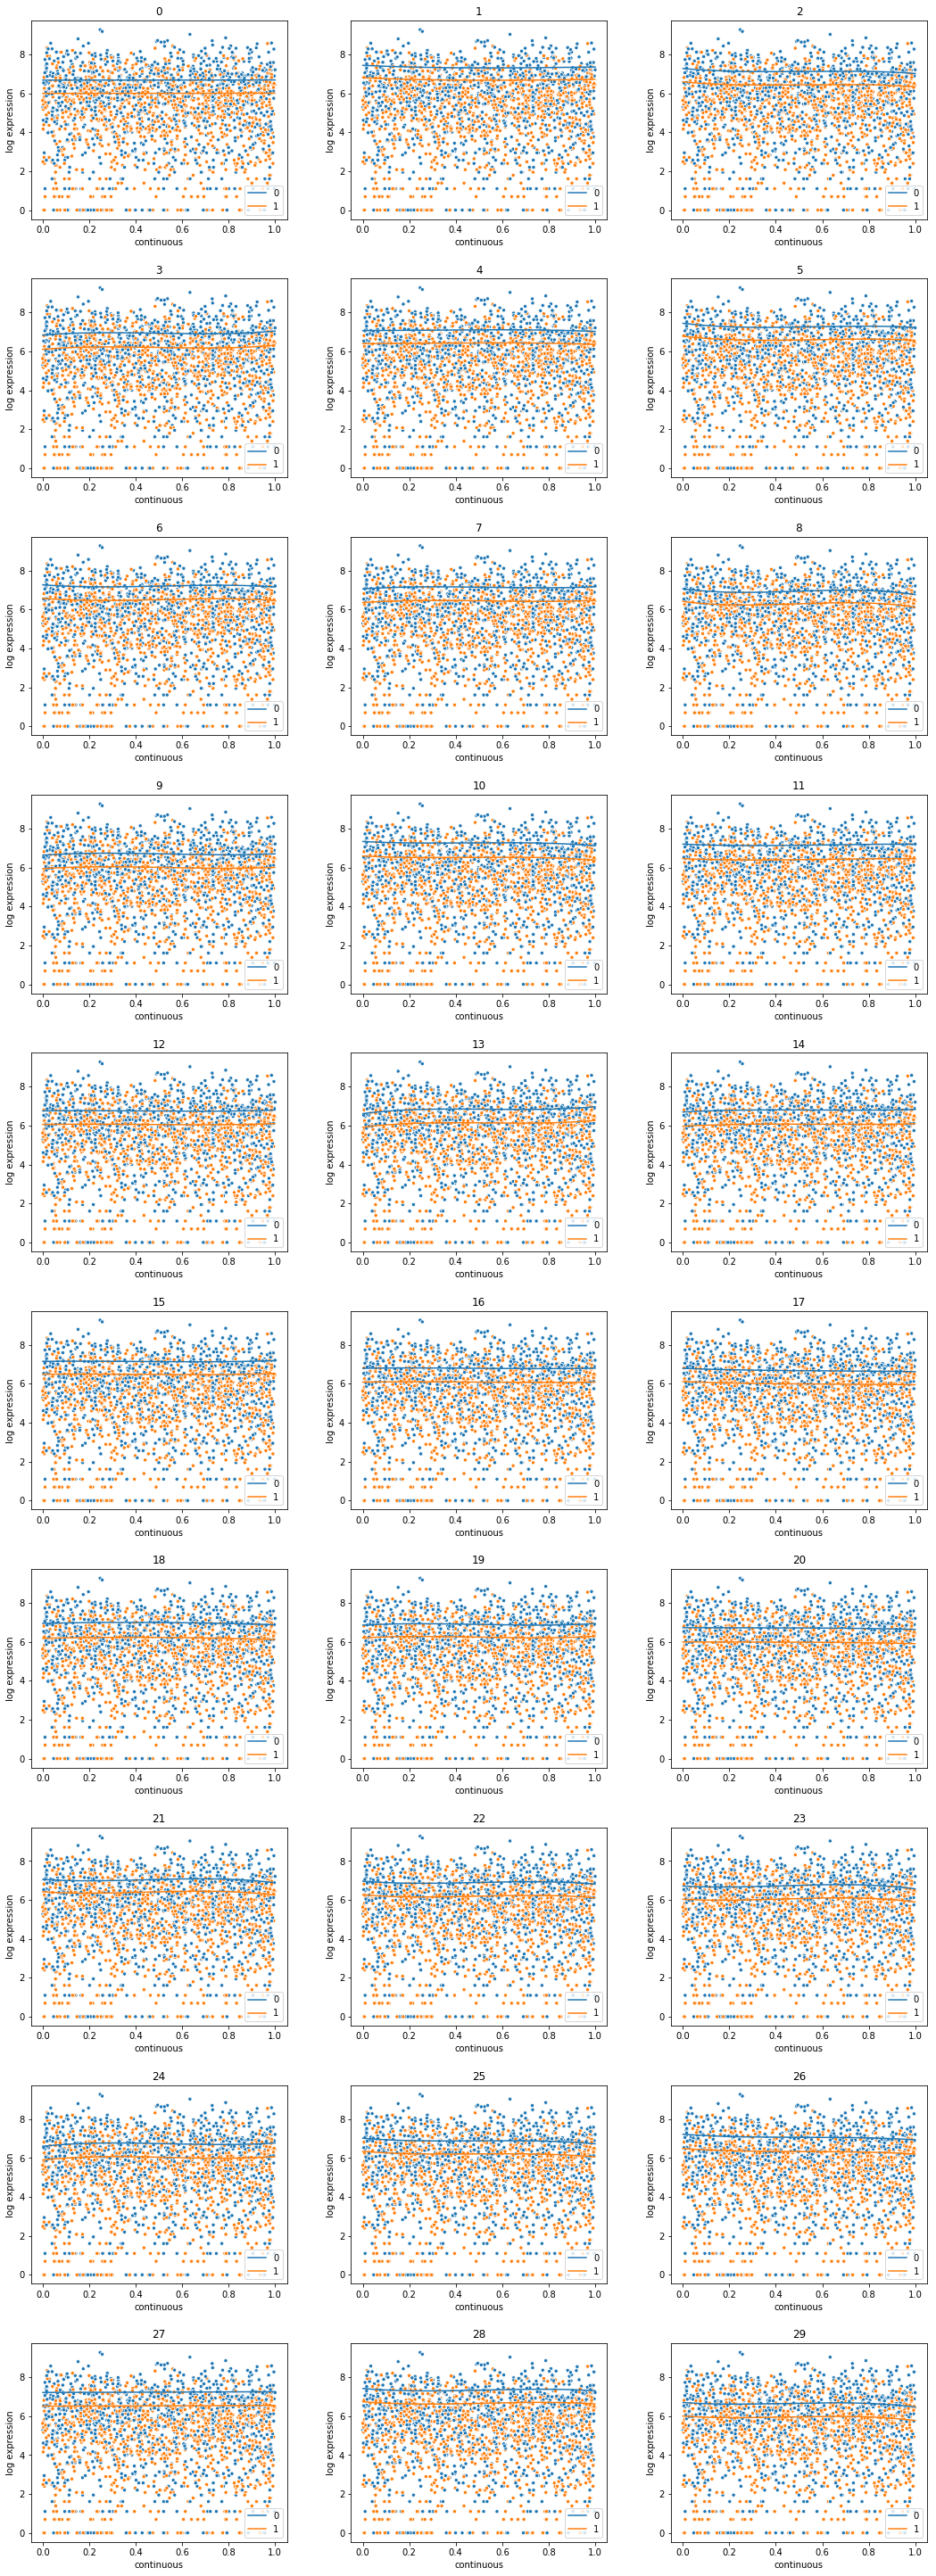

In [10]:
axs = test.plot_genes(
    genes=test.gene_ids[:30], 
    hue=random_sample_description['batch'].values,
    nonnumeric=True,
    show=True,
    size=0.1,
    ncols=3
)

Plot heatmap of all genes. This plots the models fits (essentially a smoothingk).

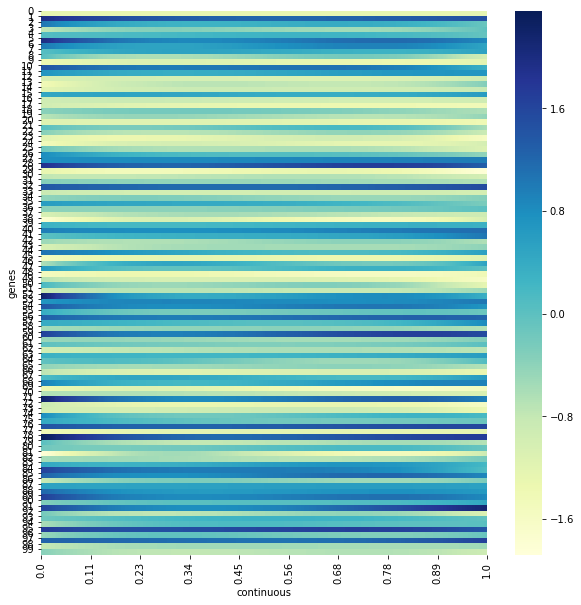

In [11]:
test.plot_heatmap(genes=test.gene_ids, transform="zscore", height_per_gene=0.1, show=True)